# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
print('\n'.join(os.listdir('data/')))

application_test.csv
application_train.csv
bureau.csv
bureau_balance.csv
credit_card_balance.csv
HomeCredit_columns_description.csv
HomeCredit_columns_description.xlsx
installments_payments.csv
POS_CASH_balance.csv
previous_application.csv
sample_submission.csv
~$HomeCredit_columns_description.xlsx


In [3]:
# desc=pd.read_csv('data/HomeCredit_columns_description.csv',encoding = "ISO-8859-1").to_excel('data/HomeCredit_columns_description.xlsx')

In [4]:
pd.set_option('display.max_columns', 500)
app_train=pd.read_csv('data/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# app_train.OCCUPATION_TYPE.unique()

In [6]:
app_test=pd.read_csv('data/application_test.csv')
print('Test data shape: ', app_test.shape)

Test data shape:  (48744, 121)


# EDA

## Target Dist

In [7]:
dist=pd.concat([app_train['TARGET'].value_counts(), app_train['TARGET'].value_counts(normalize=True)], axis=1)
dist.columns=['Count', 'Persentage']
dist

,Count,Persentage
0,282686,0.919271
1,24825,0.080729


## Missing Vals

In [8]:
def missing_table(df):
    mis_vals_count=df.isna().sum().sort_values(ascending=False)
    mis_vals_percent=mis_vals_count/df.shape[0]*100

    table=pd.concat([mis_vals_count, round(mis_vals_percent, 3)], axis=1)
    table.columns=['Missing Count', 'Missing %']
    table=table[table['Missing Count']!=0]
    print(f'Out of {df.shape[1]} columns, {table.shape[0]} has nulls')
    return table

In [9]:
pd.set_option('display.max_rows', 500)

missing_table(app_train)

Out of 122 columns, 67 has nulls


,Missing Count,Missing %
COMMONAREA_MEDI,214865,69.872
COMMONAREA_AVG,214865,69.872
COMMONAREA_MODE,214865,69.872
NONLIVINGAPARTMENTS_MODE,213514,69.433
NONLIVINGAPARTMENTS_AVG,213514,69.433
NONLIVINGAPARTMENTS_MEDI,213514,69.433
FONDKAPREMONT_MODE,210295,68.386
LIVINGAPARTMENTS_MODE,210199,68.355
LIVINGAPARTMENTS_AVG,210199,68.355
LIVINGAPARTMENTS_MEDI,210199,68.355


## Col Types

In [10]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [11]:
app_train.select_dtypes(include='object').nunique().sort_values(ascending=False)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
WALLSMATERIAL_MODE             7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
CODE_GENDER                    3
HOUSETYPE_MODE                 3
NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
dtype: int64

## Encoding

In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_cols=app_train.select_dtypes(include=numerics).columns

### LE

In [13]:
le=LabelEncoder()
le_count=0

for c in app_train.columns:
    if app_train[c].dtype=='object' and app_train[c].nunique()<=2:
        app_train[c]=le.fit_transform(app_train[c])
        app_test[c]=le.transform(app_test[c]) 
        le_count+=1

print(f'{le_count} columns were label encoded')   

4 columns were label encoded


### OHE

In [14]:
app_train, app_test=pd.get_dummies(app_train), pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 242)
Testing Features shape:  (48744, 238)


In [15]:
set(app_train.columns)-set(app_test.columns)

{'CODE_GENDER_XNA',
 'NAME_FAMILY_STATUS_Unknown',
 'NAME_INCOME_TYPE_Maternity leave',
 'TARGET'}

In [16]:

train_labels = app_train['TARGET']

app_train, app_test=app_train.align(app_test, join='inner', axis=1)
app_train['TARGET']=train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 239)
Testing Features shape:  (48744, 238)


## Outliers

In [17]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
app_train[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.000,278180.519,102790.175,100002.000,189145.500,278202.000,367142.500,456255.000
TARGET,307511.000,0.081,0.272,0.000,0.000,0.000,0.000,1.000
CNT_CHILDREN,307511.000,0.417,0.722,0.000,0.000,0.000,1.000,19.000
AMT_INCOME_TOTAL,307511.000,168797.919,237123.146,25650.000,112500.000,147150.000,202500.000,117000000.000
AMT_CREDIT,307511.000,599026.000,402490.777,45000.000,270000.000,513531.000,808650.000,4050000.000
AMT_ANNUITY,307499.000,27108.574,14493.737,1615.500,16524.000,24903.000,34596.000,258025.500
AMT_GOODS_PRICE,307233.000,538396.207,369446.461,40500.000,238500.000,450000.000,679500.000,4050000.000
REGION_POPULATION_RELATIVE,307511.000,0.021,0.014,0.000,0.010,0.019,0.029,0.073
DAYS_BIRTH,307511.000,-16036.995,4363.989,-25229.000,-19682.000,-15750.000,-12413.000,-7489.000
DAYS_EMPLOYED,307511.000,63815.046,141275.767,-17912.000,-2760.000,-1213.000,-289.000,365243.000


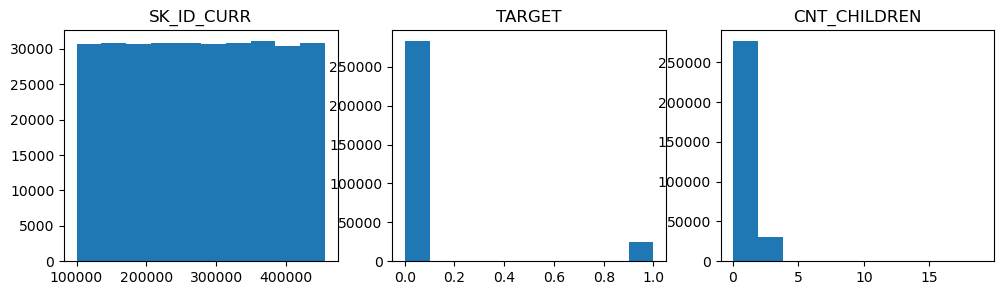

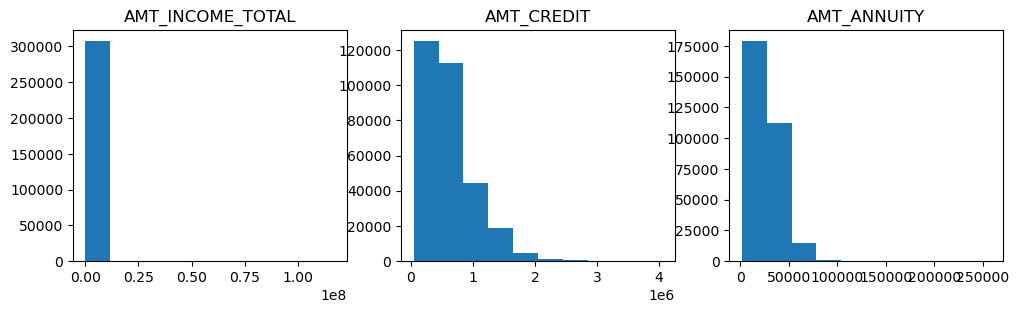

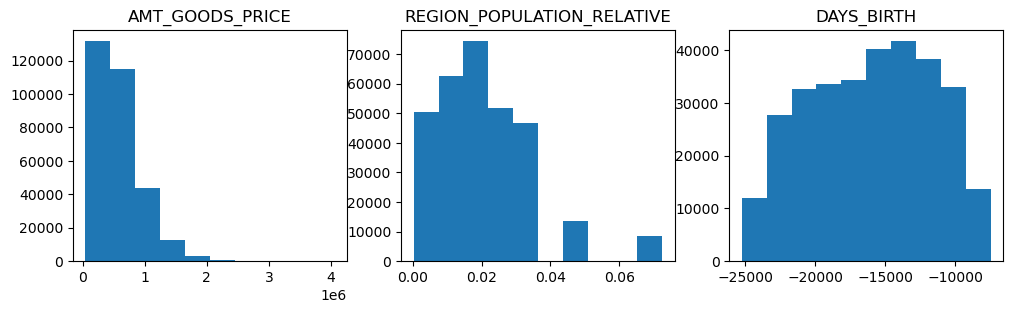

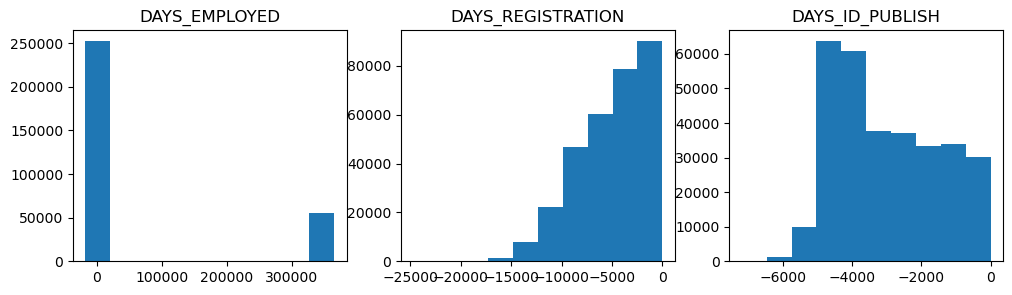

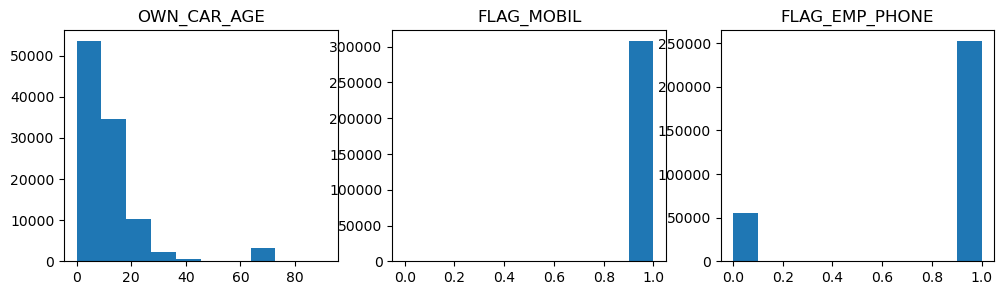

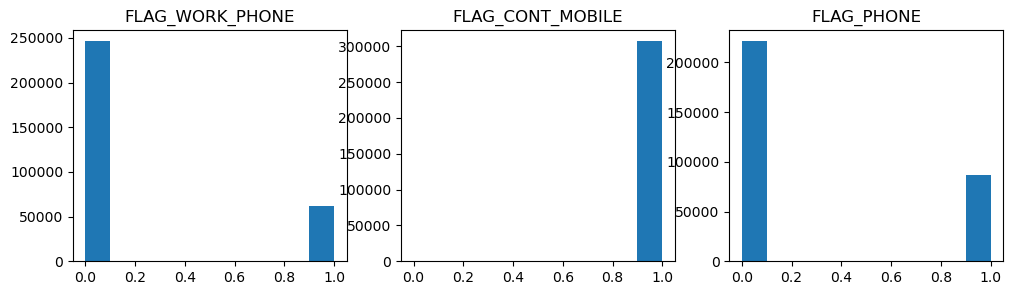

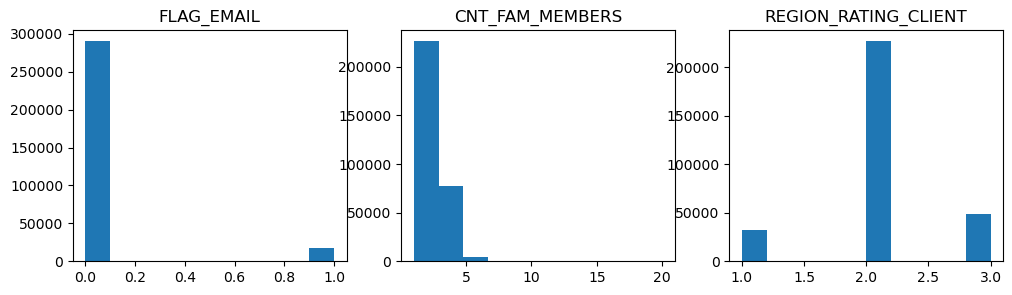

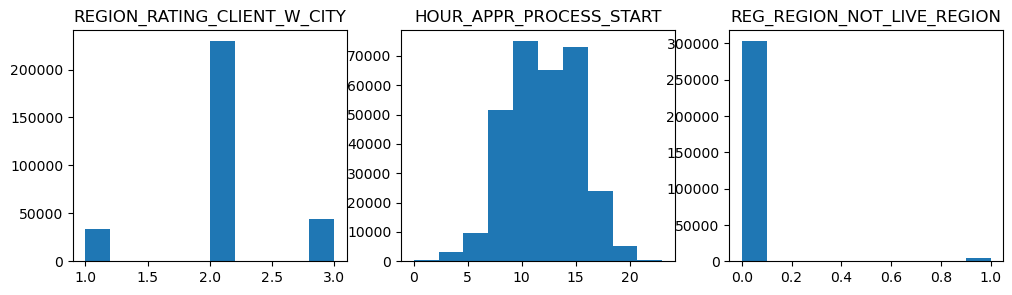

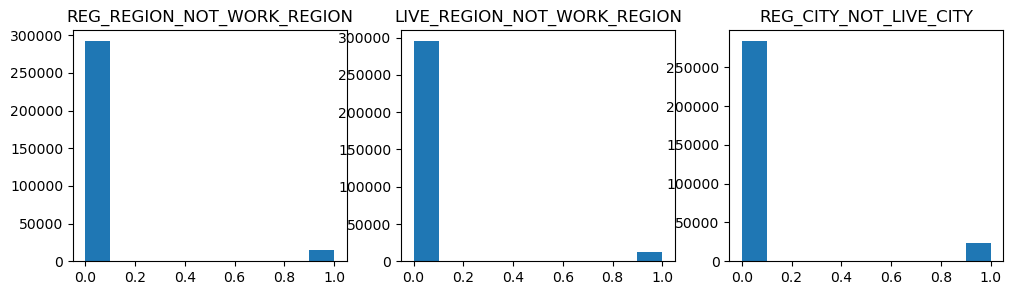

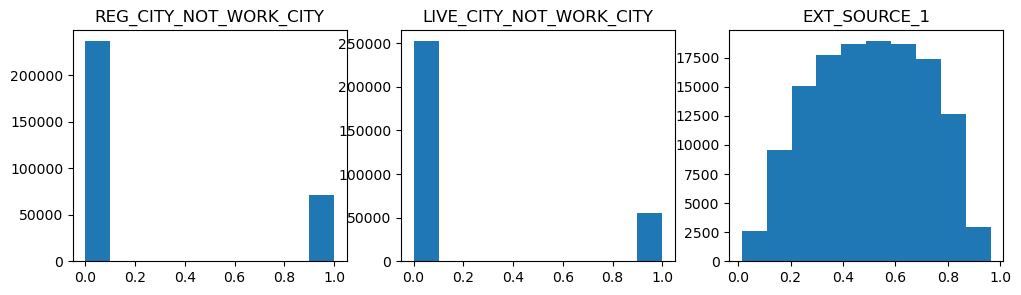

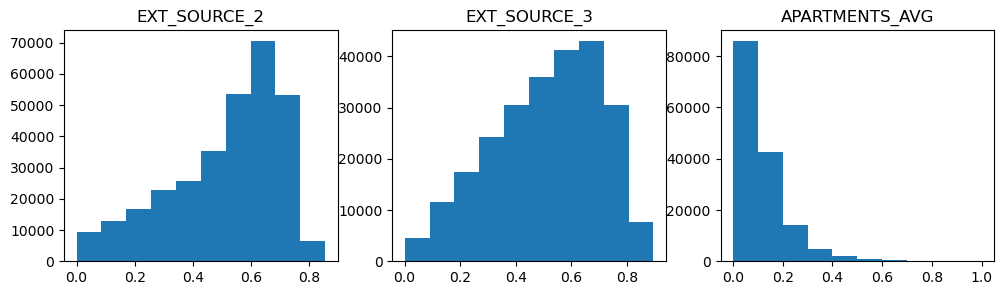

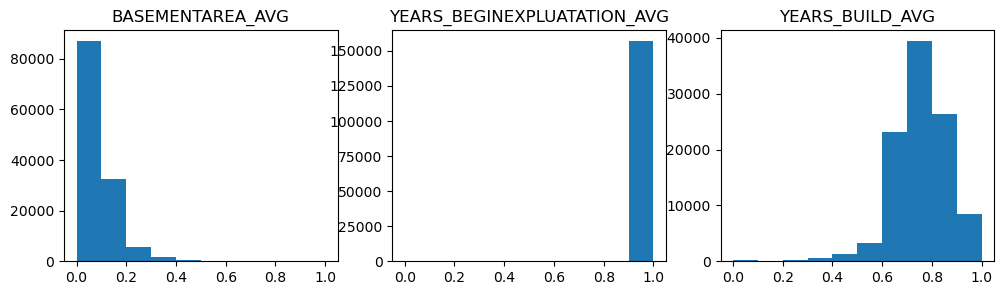

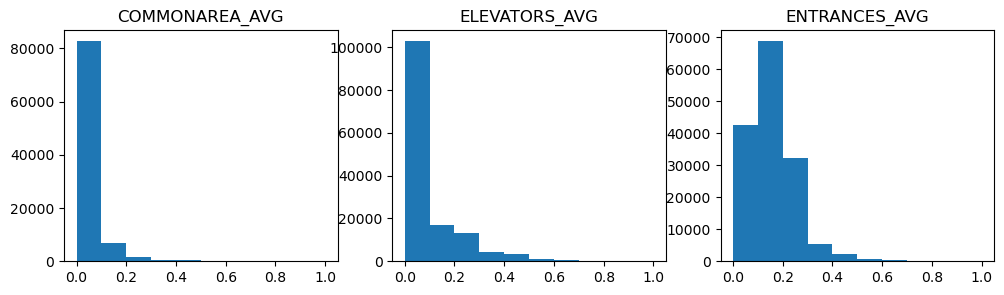

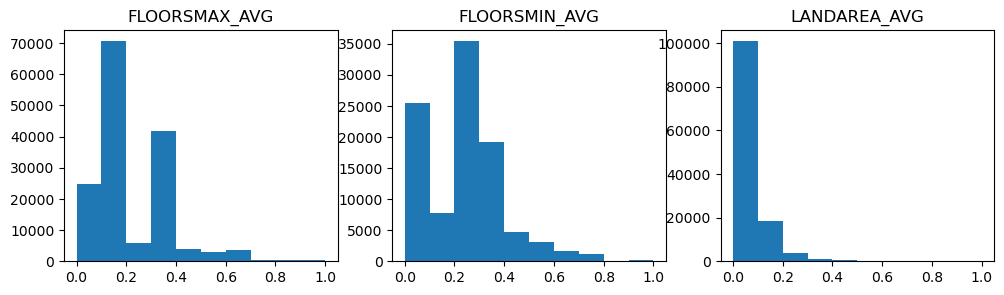

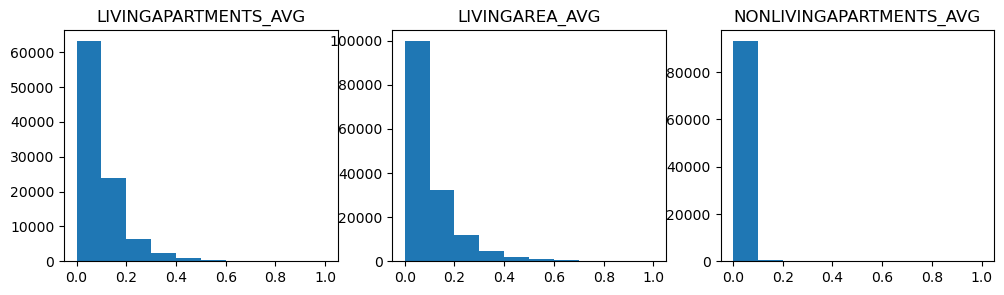

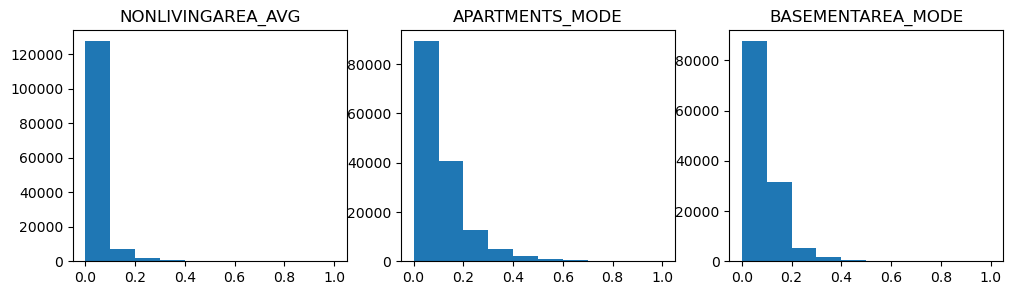

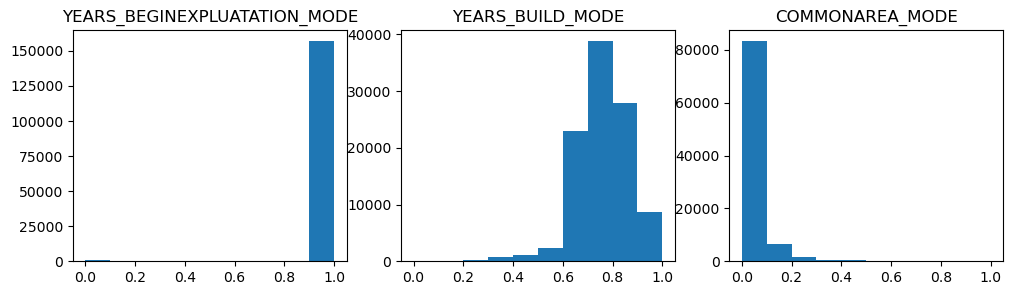

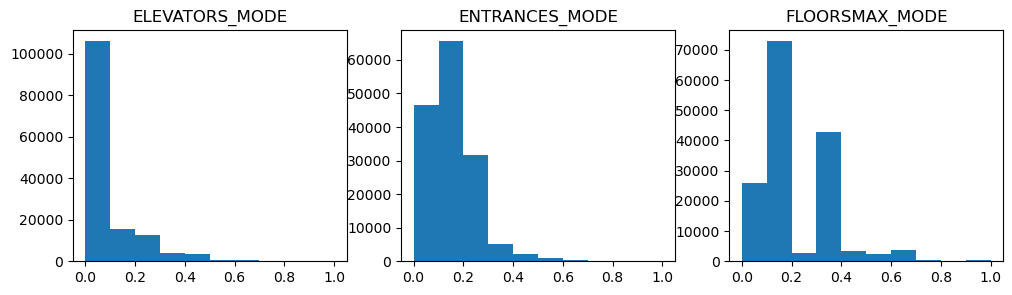

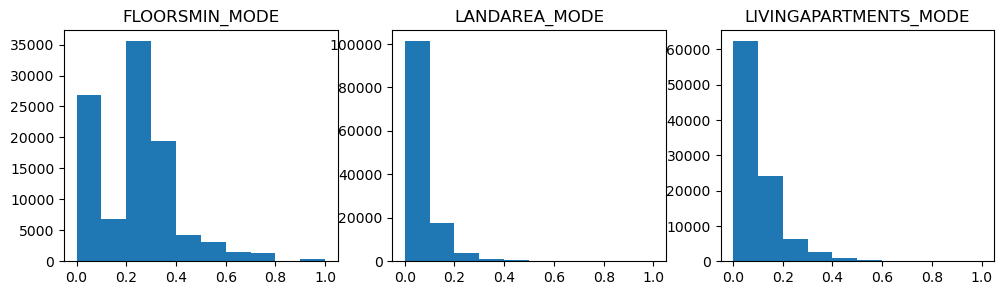

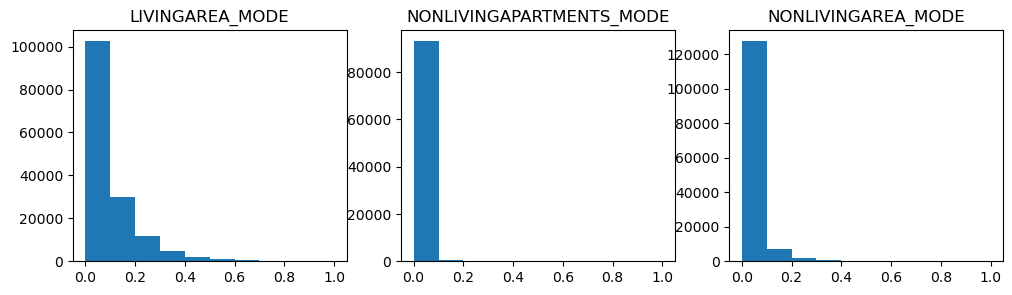

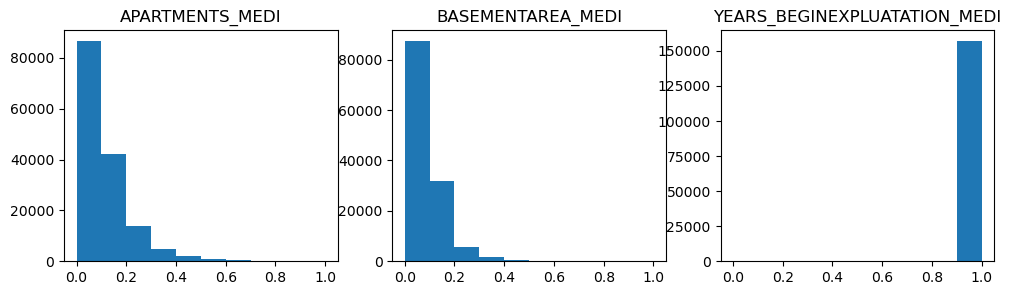

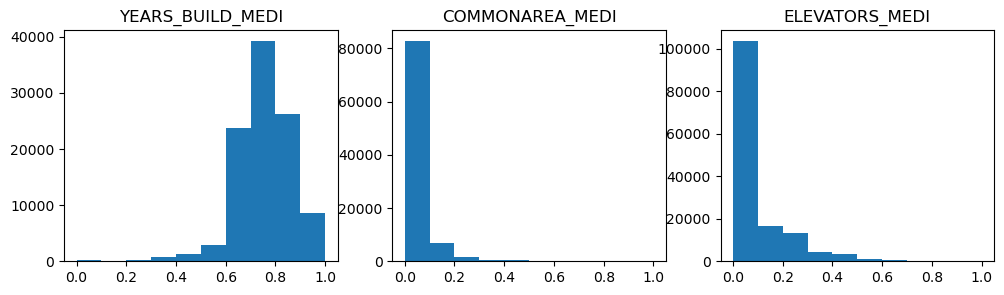

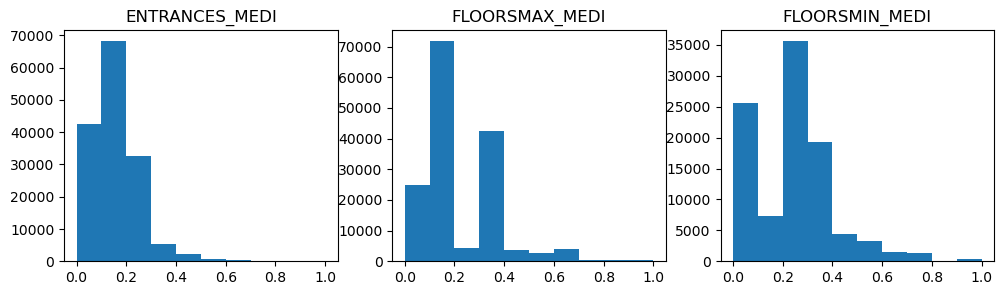

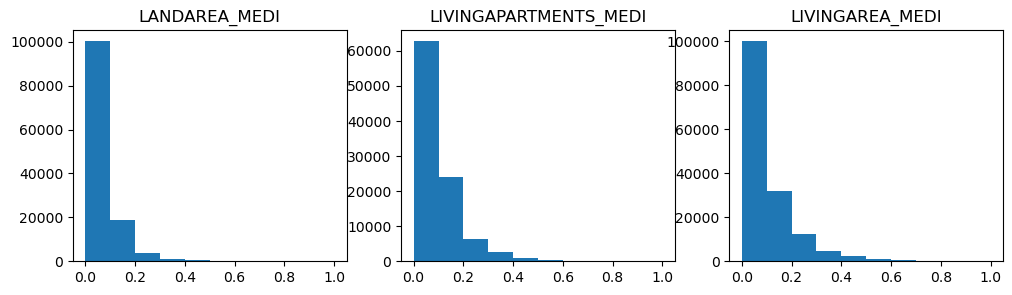

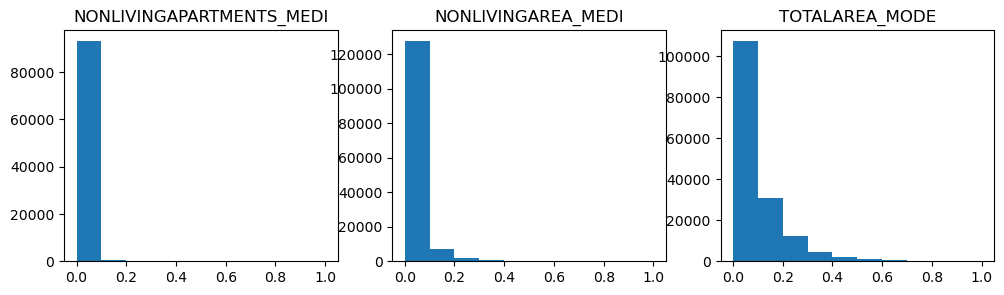

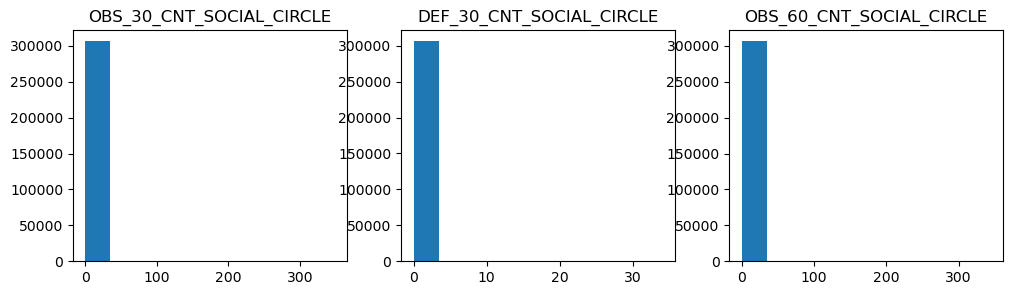

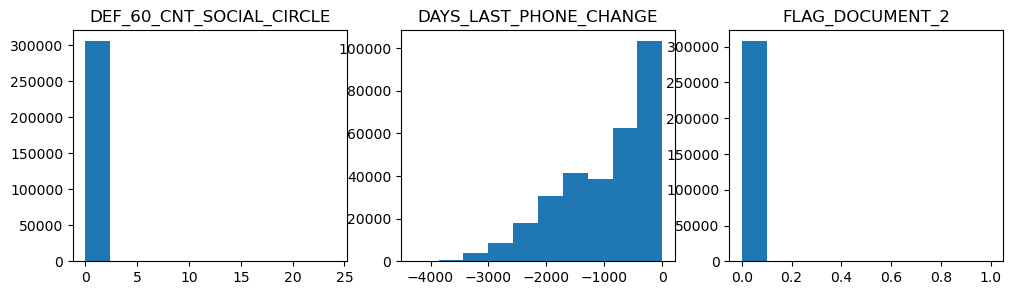

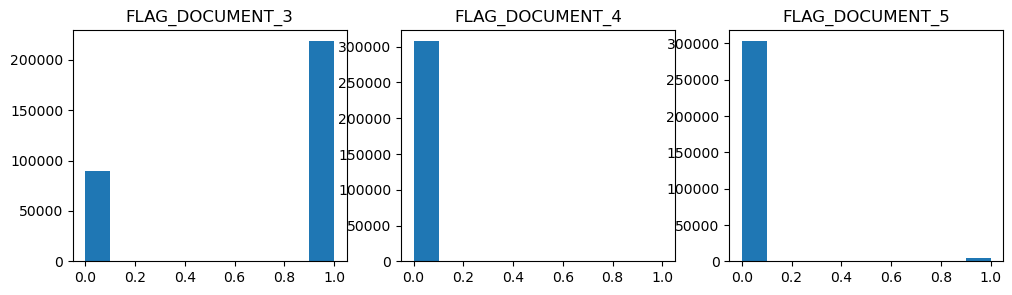

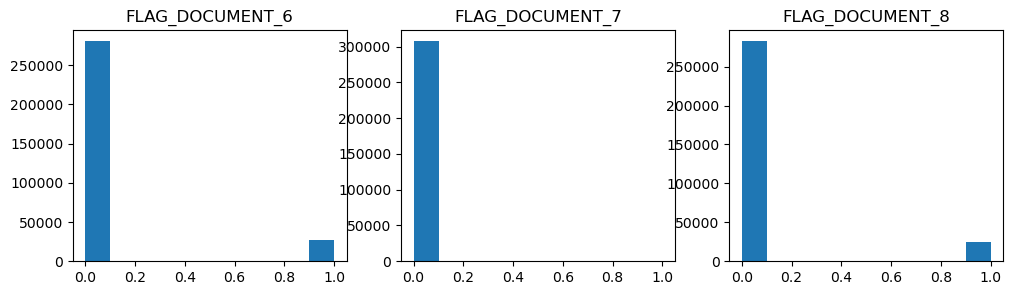

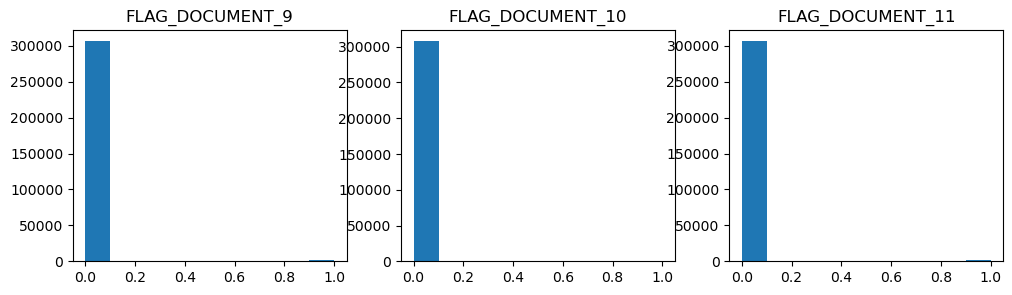

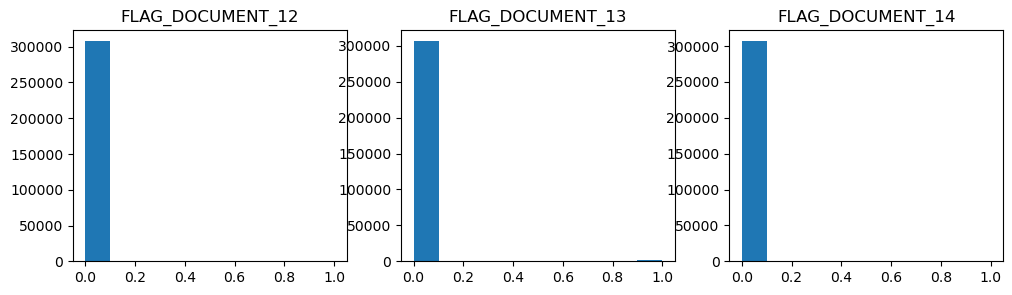

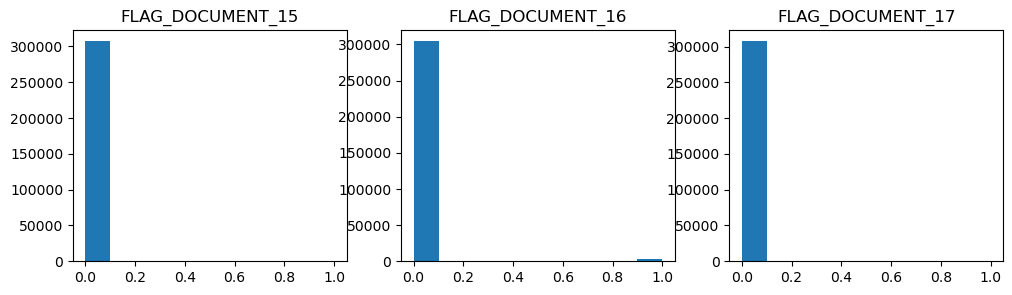

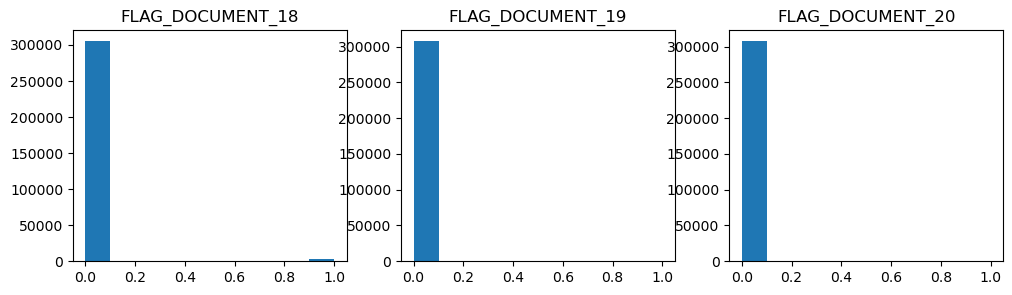

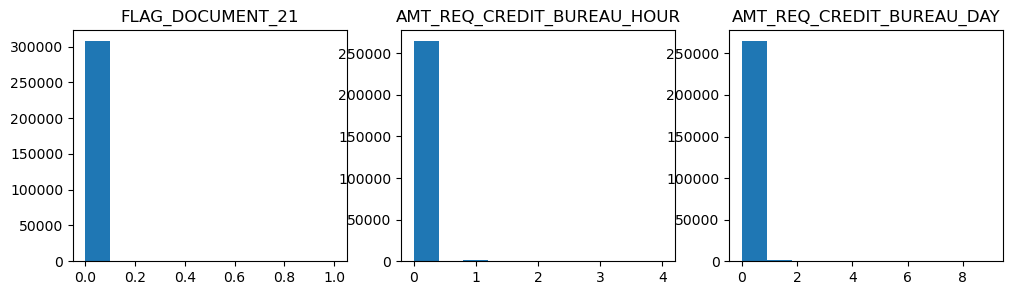

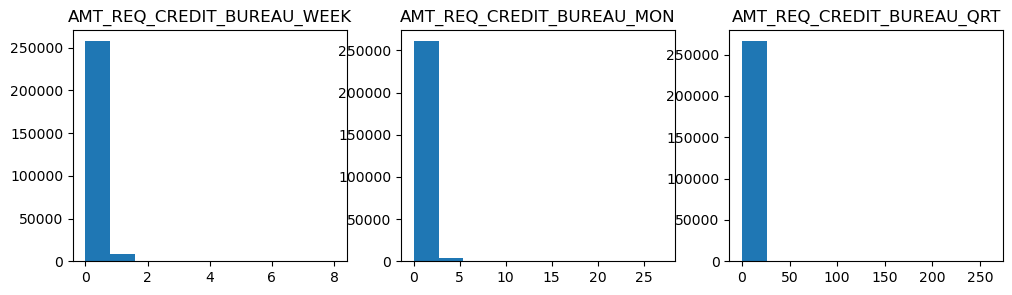

In [18]:
for c in range(0, len(numeric_cols)-2, 3):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))
    for i, ax in enumerate((ax1, ax2, ax3)):
        ax.hist(app_train[numeric_cols[c+i]])
        ax.set_title(f'{numeric_cols[c+i]}')

* Anomaly (but possible): CNT_CHILDREN?, AMT_INCOME_TOTAL, AMT_CREDIT??, AMT_ANNUITY?, AMT_GOODS_PRICE??, DAYS_REGISTRATION?, OWN_CAR_AGE?? CNT_FAM_MEMBERS??, APARTMENTS_AVG??, BASEMENTAREA_AVG??, YEARS_BEGINEXPLUATATION_AVG, COMMONAREA_AVG?,LANDAREA_AVG??, NONLIVINGAPARTMENTS_MODE, , COMMONAREA_MODE?, YEARS_BEGINEXPLUATATION_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAPARTMENTS_MEDI, AMT_REQ_CREDIT_BUREAU_HOUR
* Impossible: DAYS_EMPLOYED, 

In [19]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

## Correlations

In [20]:
correlations=app_train.corr()['TARGET'].sort_values()

In [21]:
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                            0.043
FLAG_DOCUMENT_3                                     0.044
REG_CITY_NOT_LIVE_CITY                              0.044
FLAG_EMP_PHONE                                      0.046
NAME_EDUCATION_TYPE_Secondary / secondary special   0.050
REG_CITY_NOT_WORK_CITY                              0.051
DAYS_ID_PUBLISH                                     0.051
CODE_GENDER_M                                       0.055
DAYS_LAST_PHONE_CHANGE                              0.055
NAME_INCOME_TYPE_Working                            0.057
REGION_RATING_CLIENT                                0.059
REGION_RATING_CLIENT_W_CITY                         0.061
DAYS_EMPLOYED                                       0.075
DAYS_BIRTH                                          0.078
TARGET                                              1.000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                           -0.

In [22]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

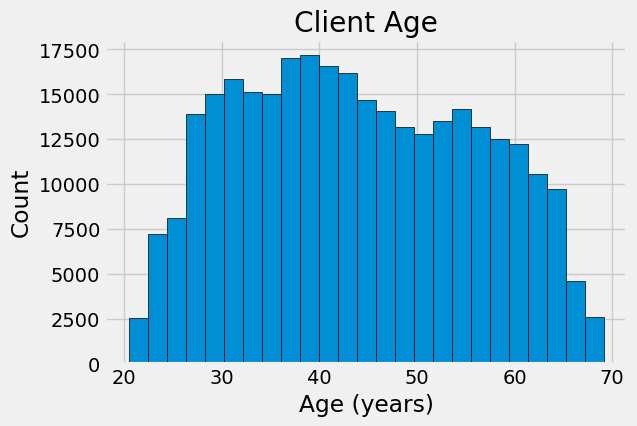

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 4))
plt.hist(app_train['DAYS_BIRTH']/365, edgecolor='k', bins=25)
plt.title('Client Age')
plt.xlabel('Age (years)')
plt.ylabel('Count');

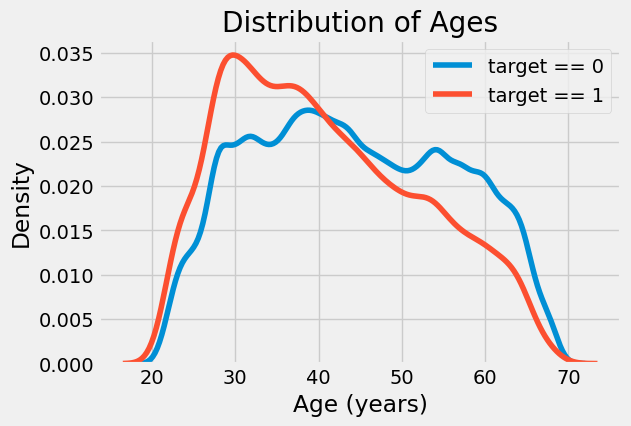

In [24]:
plt.figure(figsize=(6, 4))
sns.kdeplot(app_train.loc[app_train['TARGET']==0, 'DAYS_BIRTH']/365, label='target == 0')
sns.kdeplot(app_train.loc[app_train['TARGET']==1, 'DAYS_BIRTH']/365, label='target == 1')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.legend();

In [25]:
age_data=app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH']=age_data['DAYS_BIRTH']/365
age_data['YEARS_BINNED']=pd.cut(age_data['YEARS_BIRTH'], np.linspace(20, 70, 11))
age_groups=age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123,8532.796,23.378
"(25.0, 30.0]",0.111,10155.219,27.823
"(30.0, 35.0]",0.103,11854.848,32.479
"(35.0, 40.0]",0.089,13707.908,37.556
"(40.0, 45.0]",0.078,15497.661,42.459
"(45.0, 50.0]",0.074,17323.900,47.463
"(50.0, 55.0]",0.067,19196.495,52.593
"(55.0, 60.0]",0.055,20984.263,57.491
"(60.0, 65.0]",0.053,22780.547,62.412


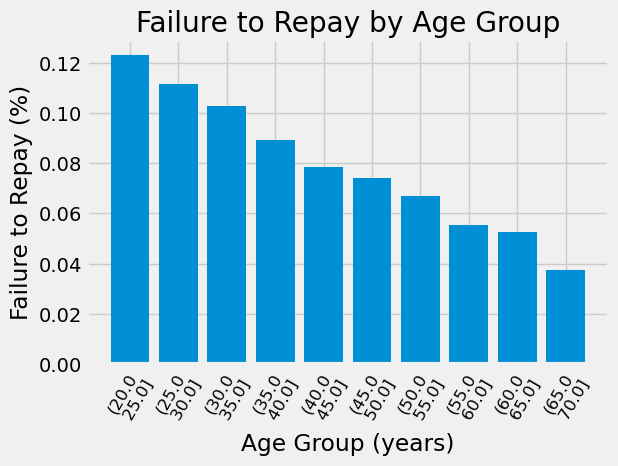

In [26]:
bars=['\n'.join(str(x).split(',')) for x in age_groups.index]

plt.figure(figsize=(6, 4))
plt.bar(bars, age_groups['TARGET'])
plt.xticks(rotation=60, fontsize=12)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [27]:
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000,-0.155,-0.160,-0.179,-0.078
EXT_SOURCE_1,-0.155,1.000,0.214,0.187,0.601
EXT_SOURCE_2,-0.160,0.214,1.000,0.109,0.092
EXT_SOURCE_3,-0.179,0.187,0.109,1.000,0.205
DAYS_BIRTH,-0.078,0.601,0.092,0.205,1.000


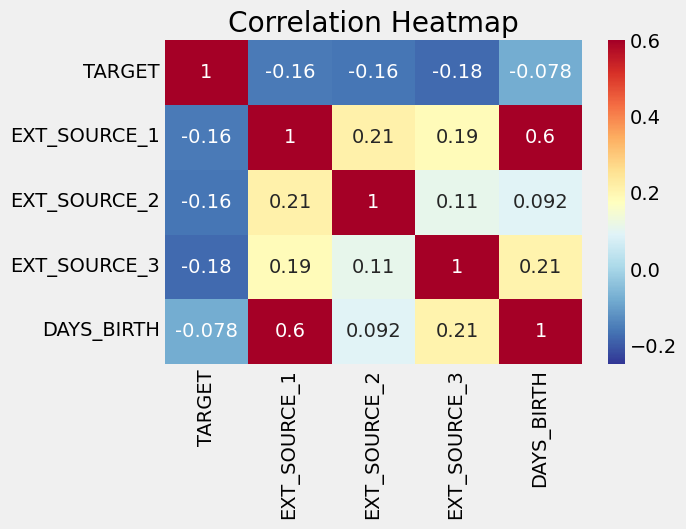

In [28]:
plt.figure(figsize=(6, 4))
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

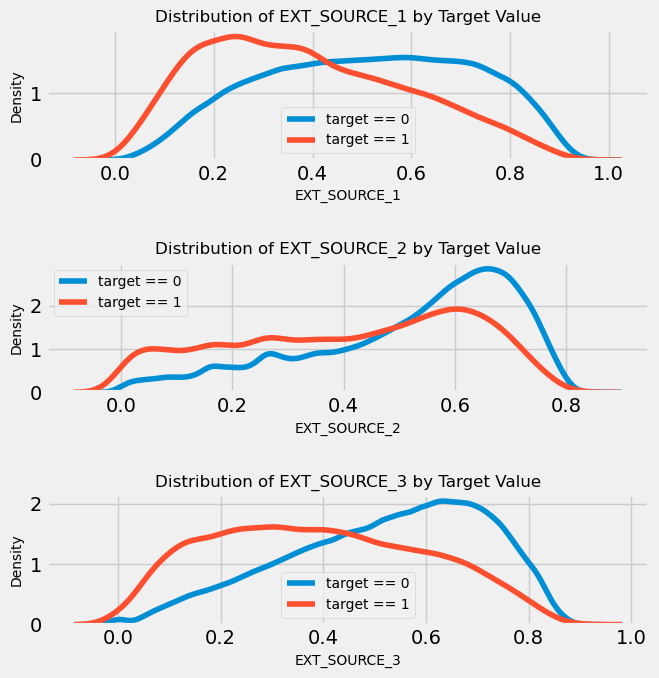

In [29]:
plt.figure(figsize=(7, 7))

for i in range(1,4):
    plt.subplot(3,1,i)
    sns.kdeplot(app_train.loc[app_train['TARGET']==0, f'EXT_SOURCE_{i}'], label='target == 0')
    sns.kdeplot(app_train.loc[app_train['TARGET']==1, f'EXT_SOURCE_{i}'], label='target == 1')
    plt.title(f'Distribution of EXT_SOURCE_{i} by Target Value', fontsize=12)
    plt.xlabel(f'EXT_SOURCE_{i}', fontsize=10)
    plt.ylabel('Density', fontsize=10);
    plt.legend(fontsize='10')
    
plt.tight_layout(h_pad=2)

# Feature Engineering

## Polynomial Features

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

poly_features=app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test=app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

imputer=SimpleImputer(strategy='median')

poly_features, poly_target=poly_features.drop('TARGET', axis=1), poly_features['TARGET']
poly_features, poly_features_test=imputer.fit_transform(poly_features), imputer.transform(poly_features_test)

poly_tr=PolynomialFeatures(3)
poly_features, poly_features_test=poly_tr.fit_transform(poly_features), poly_tr.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [31]:
poly_names=poly_tr.get_feature_names(input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])
poly_names[:10]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2']

In [32]:
poly_features=pd.DataFrame(poly_features, columns=poly_names)
poly_features['TARGET']=poly_target

poly_corrs=poly_features.corr()['TARGET'].sort_values()
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.194
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.190
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172
EXT_SOURCE_1 EXT_SOURCE_2                -0.167
EXT_SOURCE_1 EXT_SOURCE_3                -0.164
EXT_SOURCE_2                             -0.160
EXT_SOURCE_2 DAYS_BIRTH                  -0.157
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.157
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078
DAYS_BIRTH^2   -0.077
DAYS_BIRTH^3   -0.074
TARGET          1.000
1                 NaN
Name: TARGET, dtype: float64


In [37]:
poly_features_test=pd.DataFrame(poly_features_test, columns=poly_names)

poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly=app_train.merge(poly_features, on='SK_ID_CURR', how='left')

poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly=app_test.merge(poly_features_test, on='SK_ID_CURR', how='left')

app_train_poly, app_test_poly=app_train_poly.align(app_test_poly, join='inner', axis=1)

print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 274)
Testing data with polynomial features shape:   (48744, 274)


In [38]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [39]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

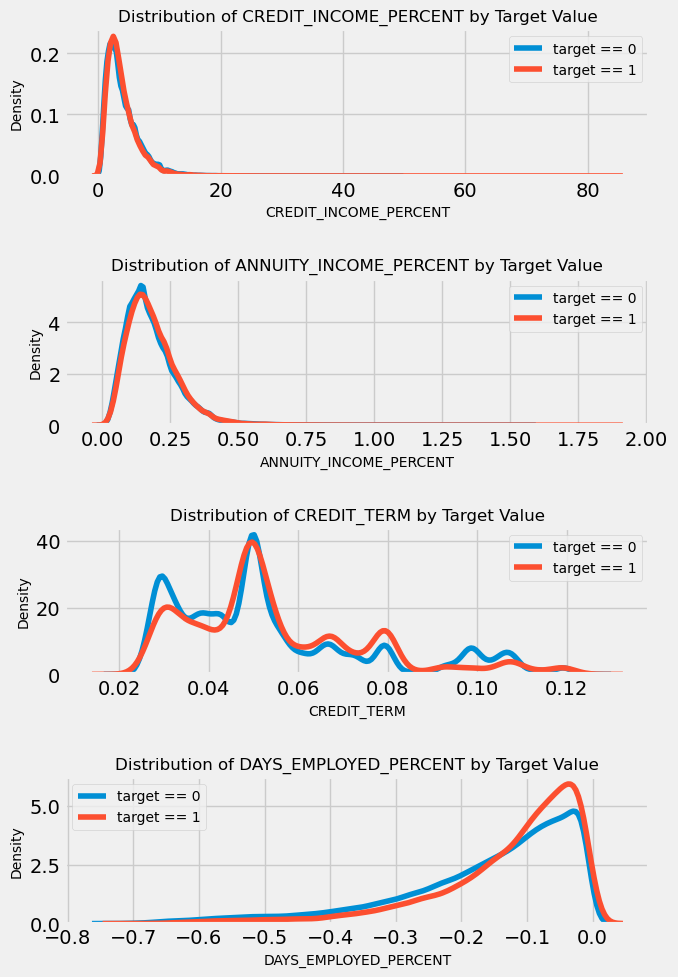

In [43]:
plt.figure(figsize=(7, 10))

for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    plt.subplot(4,1,i+1)
    sns.kdeplot(app_train_domain.loc[app_train['TARGET']==0, feature], label='target == 0')
    sns.kdeplot(app_train_domain.loc[app_train['TARGET']==1, feature], label='target == 1')
    plt.title(f'Distribution of {feature} by Target Value', fontsize=12)
    plt.xlabel(f'{feature}', fontsize=10)
    plt.ylabel('Density', fontsize=10);
    plt.legend(fontsize='10')
    
plt.tight_layout(h_pad=2)

# Baseline model